# Modelagem de Tópicos com a TF-IDF

In [1]:
import numpy as np
import pandas as pd
import spacy
import os
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [2]:
current_dir = os.getcwd()
table_path = os.path.join(current_dir, '..', 'Dados_NLP', 'df_completo.xlsx')
dados_total = pd.read_excel(table_path)

In [3]:
abstracts = dados_total["Abstract"] #.iloc[:1000]

abstracts = abstracts.dropna()

index = abstracts.index

titles = list()

for id in index:
    a = dados_total['Article Title'][id]
    titles.append(a)

In [4]:
nlp = spacy.load('en_core_web_sm')

abs = list()

for texto in abstracts:

    # Tookenização
    texto = nlp(texto)

    # Remover stop_words
    w = [t for t in texto if not t.is_stop and t.is_alpha] 

    # Transforma os tokens em string
    string = [str(word) for word in w]

    # Junta as strings em uma sentença
    string_resultante = ' '.join(string)
    
    # Armazena a sentença em uma lista 
    abs.append(string_resultante)

### Obter a TF-IDF.

In [5]:
tfidf = TfidfVectorizer()

csr_mat = tfidf.fit_transform(abstracts)

words = tfidf.get_feature_names_out()
#print(csr_mat)

In [6]:
# Visualizar vocabulario

tfidf.vocabulary_

{'we': 36538,
 'investigated': 19721,
 'the': 34225,
 'associations': 6859,
 'between': 7708,
 'dietary': 12598,
 'intake': 19399,
 'of': 25113,
 'folate': 15705,
 'and': 6056,
 'vitamin': 36333,
 'b2': 7216,
 'mthfr': 23372,
 'c677t': 8569,
 'genotype': 16383,
 'colorectal': 10240,
 'adenomas': 5113,
 'in': 18887,
 'dutch': 13410,
 'case': 8934,
 'control': 10985,
 'study': 33138,
 'data': 11862,
 'cases': 8941,
 'with': 36763,
 'at': 6900,
 'least': 20757,
 'one': 25289,
 'histologically': 17725,
 'confirmed': 10713,
 'adenoma': 5111,
 '768': 4034,
 'controls': 10992,
 'no': 24334,
 'history': 17744,
 'any': 6365,
 'type': 35281,
 'polyp': 27309,
 '709': 3882,
 'were': 36619,
 'included': 18945,
 'was': 36490,
 'assessed': 6827,
 'using': 35918,
 'food': 15732,
 'frequency': 15935,
 'questionnaire': 28706,
 'multivariable': 23526,
 'models': 23027,
 'age': 5421,
 'if': 18510,
 'appropriate': 6484,
 'calcium': 8646,
 'adjusted': 5195,
 'odds': 25084,
 'ratio': 28951,
 'or': 25430,
 '9

In [7]:
# Cria uma matriz de zeros
df_tf_idf = pd.DataFrame(csr_mat.toarray(), columns = words)

# Transpoe matriz
df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,9998,9999,10000,10001,10002,10003,10004,10005,10006,10007
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǎi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǐn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǒng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Função para exibir os tokens mais importantes de um documento.

In [8]:
def TF_IDF_func_presrntation(Num):

    DF = df_tf_idf.T[Num].nlargest(10)

    print( 'Doc number ' , Num+1)
    print( 30*'-')
    
    return DF

In [9]:
TF_IDF_func_presrntation(1652)

Doc number  1653
------------------------------


religious        0.626331
denomination     0.351588
commitment       0.305312
korean           0.238409
christian        0.211827
american         0.201270
women            0.170184
denominations    0.117196
catholic         0.108661
polychotomous    0.108661
Name: 1652, dtype: float64

### Calculando a SVD

In [10]:
# Reduzir a dimensicionalidade dos dados
svd = TruncatedSVD(n_components=10)
lsa = svd.fit_transform(csr_mat)

# Gerando matriz com as componestes 
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"])
topic_encoded_df["titles"] = titles
display(topic_encoded_df[["titles", "topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]])

,titles,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,"Dietary intake of folate and riboflavin, MTHFR...",0.263983,0.128317,-0.055987,0.063316,0.108330,-0.144791,0.106496,-0.167621,0.139252,-0.009820
1,Human plasma carotenoid response to the ingest...,0.234045,-0.029340,-0.015647,-0.043674,0.005495,-0.034570,-0.003336,-0.136070,0.068929,-0.044372
2,Surveillance for Certain Health Behaviors and ...,0.255094,-0.047439,-0.009774,-0.129160,-0.077226,0.039893,0.009909,-0.033178,-0.032150,0.066572
3,Ethanol Consumption Does Not Promote Weight Ga...,0.195012,-0.043179,0.047597,-0.053401,0.054292,-0.053333,-0.044859,-0.126732,0.050096,-0.011079
4,Ghrelin regulates adipose tissue metabolism: R...,0.197334,-0.126852,0.016571,-0.040787,0.121793,0.012067,-0.041966,-0.044387,0.051312,-0.014601
...,...,...,...,...,...,...,...,...,...,...,...
10003,Increased risk of diseases of the basal gangli...,0.191929,-0.009245,-0.037447,-0.003819,-0.014165,0.025601,0.005489,-0.016333,-0.038045,-0.004180
10004,What is personalized medicine and what should ...,0.238844,-0.136886,0.029939,-0.053656,0.025731,-0.025732,0.009279,0.001563,-0.027796,0.028778
10005,Multiple health behaviours: overview and impli...,0.210656,-0.043162,0.027323,-0.111459,-0.069861,0.007595,0.032348,-0.045295,-0.091801,0.151809
10006,Risk factors for Epstein Barr virus-associated...,0.251845,-0.041357,-0.004037,0.009072,0.018778,-0.037936,0.045989,0.004541,-0.008612,0.067808


Vamos exibir a matriz token-tópico:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"],
                               columns=words).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
00,0.009044,0.026789,-0.013804,0.002613,0.006746,-0.002808,-0.003906,0.002273,0.005821,0.002953
000,0.012822,-0.006344,0.003244,-0.023810,-0.009107,0.015914,-0.005577,0.060307,0.027258,-0.015313
0000,0.000080,-0.000125,-0.000272,0.000421,-0.000440,0.000288,0.000131,0.000253,-0.000290,-0.000458
000002,0.000020,-0.000049,-0.000057,0.000028,-0.000029,0.000040,-0.000002,-0.000149,-0.000024,-0.000181
00001,0.000562,0.000861,0.000093,0.000945,0.001076,-0.000949,-0.000117,0.000581,-0.000450,-0.000142
...,...,...,...,...,...,...,...,...,...,...
zz,0.000038,-0.000105,-0.000134,-0.000111,0.000377,0.000287,-0.000082,0.000106,0.000103,0.000056
ǎi,0.000026,-0.000085,-0.000022,0.000030,-0.000157,0.000048,0.000066,0.000139,-0.000083,-0.000199
ǐn,0.000026,-0.000085,-0.000022,0.000030,-0.000157,0.000048,0.000066,0.000139,-0.000083,-0.000199
ǒng,0.000026,-0.000085,-0.000022,0.000030,-0.000157,0.000048,0.000066,0.000139,-0.000083,-0.000199


Vamos ordenar tópico a tópico agora.

In [12]:
list_of_topics = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

display(encoding_matrix.sort_values("topic_4", ascending=False))

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
hpv,0.027406,0.117356,0.121440,2.979781e-01,0.293056,0.077903,0.279111,0.018912,0.436734,0.451289
breast,0.087777,0.205782,0.661564,2.889372e-01,0.033731,0.260584,0.098291,0.087663,0.029590,0.044929
mortality,0.059613,0.052359,0.018243,2.626088e-01,0.074439,0.149982,0.028596,0.275212,0.305666,0.221691
patients,0.074739,0.125128,0.159080,2.080575e-01,0.133389,0.231228,0.076677,0.063484,0.149303,0.283885
health,0.054014,0.010327,0.028420,1.903748e-01,0.126915,0.038167,0.026504,0.060702,0.130063,0.153911
...,...,...,...,...,...,...,...,...,...,...
endosc,0.000055,0.000138,0.000139,3.148809e-08,0.000106,0.000197,0.000711,0.000052,0.000314,0.000178
synergize,0.000090,0.000282,0.000237,2.005947e-08,0.000313,0.000416,0.000033,0.000078,0.000143,0.000044
6years,0.000053,0.000240,0.000088,9.634878e-09,0.000041,0.000043,0.000059,0.000163,0.000285,0.000002
32826,0.000053,0.000142,0.000124,7.075290e-09,0.000113,0.000039,0.000105,0.000343,0.000204,0.000003


Podemos também graficar os tópicos como mostrado abaixo:

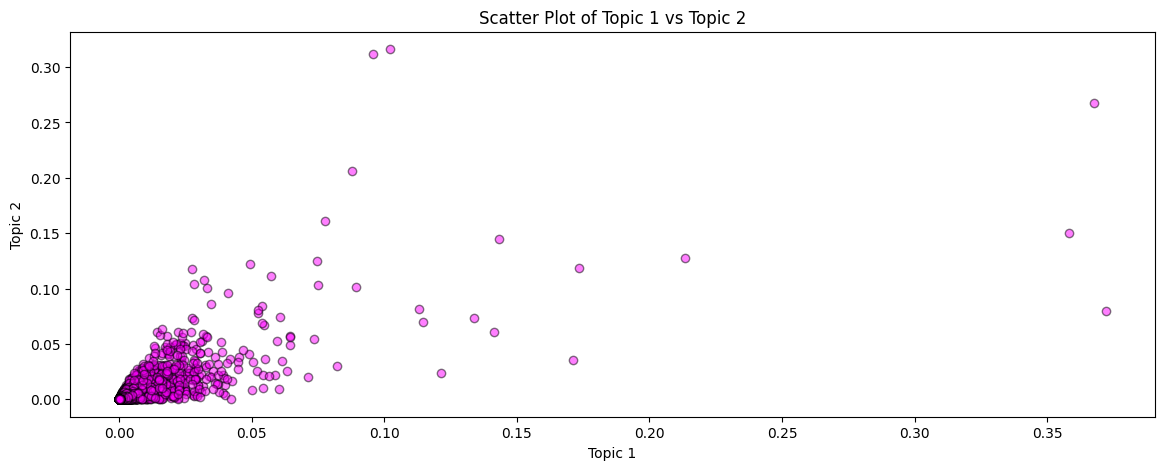

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(encoding_matrix["topic_1"], encoding_matrix["topic_2"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2')

plt.show()

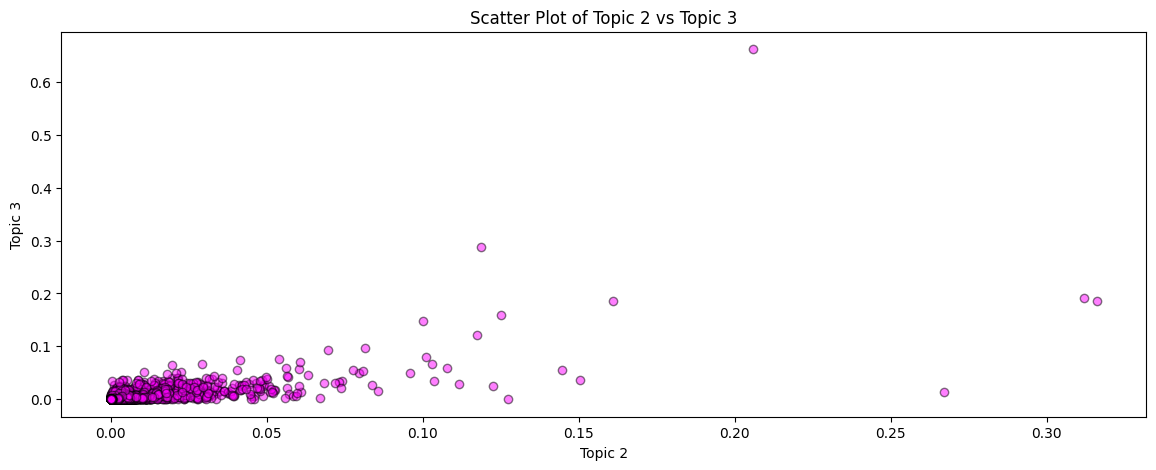

In [14]:
fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(encoding_matrix["topic_2"], encoding_matrix["topic_3"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 2')
ax.set_ylabel('Topic 3')
ax.set_title('Scatter Plot of Topic 2 vs Topic 3')

plt.show()

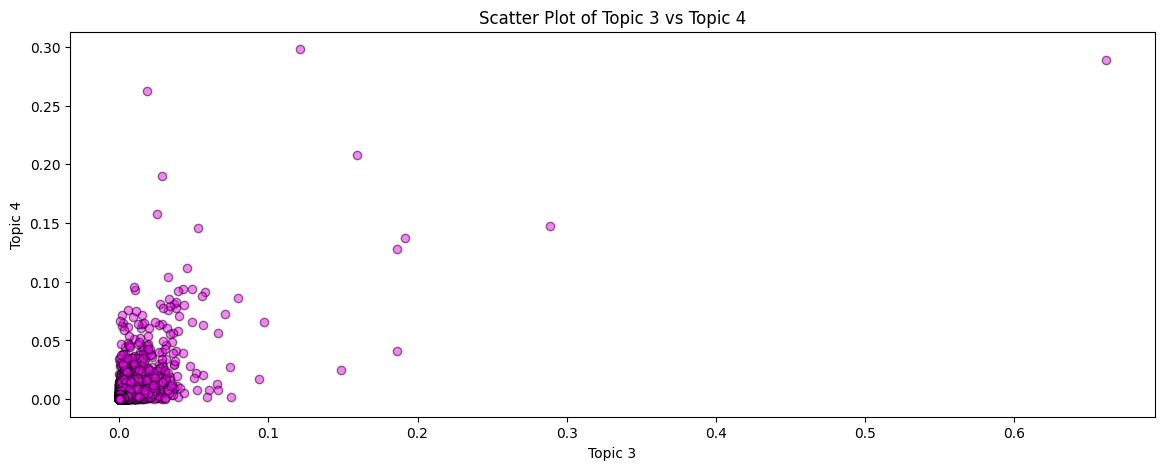

In [15]:
fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(encoding_matrix["topic_3"], encoding_matrix["topic_4"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4')

plt.show()

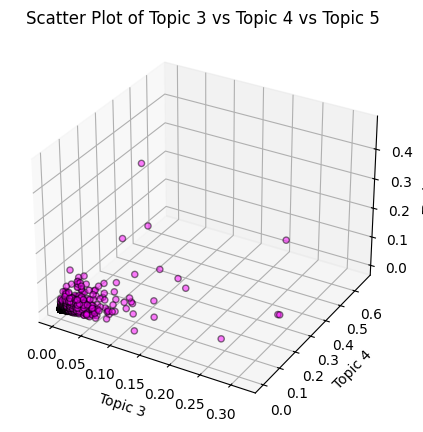

In [16]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(encoding_matrix["topic_2"].values, encoding_matrix["topic_3"].values, encoding_matrix["topic_5"].values, alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_zlabel('Topic 5')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4 vs Topic 5')

plt.show()

### Agrupamento com k-means

Inspirados pelos gráficos anteriores, podemos realizar um agrupamento dos dados, como já aprendemos na Disciplina de Aprendizado de máquina, podemos utilizar o k-means. Façamos isso então:

In [17]:
svd = TruncatedSVD(n_components=10)
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(csr_mat)
labels = pipeline.predict(csr_mat)

c:\venv\ilumpy-VS\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\venv\ilumpy-VS\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [18]:
df = pd.DataFrame({'labels': labels, 'docs': titles, 'abstract': abstracts})
print(df.sort_values('labels'))

       labels                                               docs  \
10412       0  Prescription opioid use: Patient characteristi...   
2987        0  Exposure to revised drinking guidelines and 'C...   
8961        0        Chronic bronchitis in an elderly population   
2993        0  Factors Associated with Organized and Opportun...   
8951        0  BONE-DENSITY AND LIFE-STYLE CHARACTERISTICS IN...   
...       ...                                                ...   
8638        9  A summary measure of pro- and anti-oxidant exp...   
8633        9                   DIETARY CORRELATES OF FAT INTAKE   
3474        9  Dietary acrylamide intake and the risk of endo...   
3492        9  Risk Factors Associated With Young-Onset Color...   
0           9  Dietary intake of folate and riboflavin, MTHFR...   

                                                abstract  
10412  Objectives: Opioid pain medication misuse is a...  
2987   Background: January 2016 saw the publication o...  
8961  

Salvanto planilha com a classificação por tópicos.

In [19]:
#df.to_excel('topics.xlsx')